# Практическая работа 1. Индекс счастья

## Загрузка данных

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
happy=pd.read_csv('/Users/zagranichnyid/Downloads/archive/2019.csv')
happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Первичный анализ данных

In [11]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### В датасете нет пропусков значений и задействовано 3 формата данных.

## Для начала посмотрим победителей и аутсайдеров рейтинга

### Топ-10 рейтинга

In [12]:
happy.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


#### Чаще всего в топе рейтинга встречаются скандинаские страны.

### АнтиТоп-10 рейтинга

In [13]:
happy.tail(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


#### Чаще всего здесь фигурируют ближневосточные и африканские страны.

## Гипотеза: между некоторыми параметрами индекса существует корреляция

### Для начала посмотрим есть ли корреляция между GPD и непритятием коррупции населением

In [14]:
happy['GDP per capita'].corr(happy['Perceptions of corruption'])

0.29891984568349267

#### Корреляция слабая, поэтому посмотрим другие параметры

In [15]:
happy['GDP per capita'].corr(happy['Social support'])

0.7549057272454567

### Посмотрим есть ли корреляция между GPD и социальной поддержкой

#### Здесь уже хорошая корреляция, которую можно отразить на координатной плоскости.

<AxesSubplot:xlabel='GDP per capita', ylabel='Social support'>

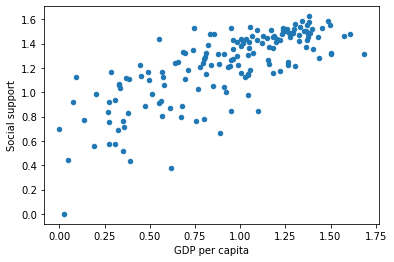

In [17]:
happy.plot('GDP per capita','Social support', kind='scatter')

### Также можем посмотреть корреляцию между социальной поддержкой и свободой в выборе

In [29]:
happy['Social support'].corr(happy['Freedom to make life choices'])

0.447333163587702

<AxesSubplot:xlabel='Social support', ylabel='Freedom to make life choices'>

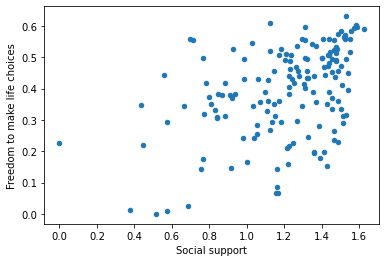

In [28]:
happy.plot('Social support','Freedom to make life choices', kind='scatter')

#### Корреляция менее выражена. На графике видно что точки широко разбросаны на координатной плоскости.

### Таким образом мы установили наличие корреляции между GDP и социальной поддержкой.

## Гипотеза: Чем страна богаче, тем она выше в топе

In [27]:
happy.sort_values(by=('GDP per capita'),ascending=False).head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128


### Как видим гипотеза не подтвердилась, так как в страны топа сильно обновились (появились страны Персидского залива и автономные области Китая)

## Построим график рейтинга

### Для начала посмотрим частотное распредление исходных данных по рейтингу

In [42]:
happy['Score'].value_counts()

5.208    2
7.769    1
4.883    1
4.812    1
4.799    1
        ..
5.940    1
5.895    1
5.893    1
5.890    1
2.853    1
Name: Score, Length: 155, dtype: int64

### Как видите здесь крайне низкое количество совпадений значений

### Приведем значения к формуту int64

In [38]:
def score_short(int):
    if int <1:
        return 0
    elif int <2:
        return 1
    elif int <3:
        return 2
    elif int <4:
        return 3
    elif int <5:
        return 4
    elif int <6:
        return 5
    elif int <7:
        return 6
    elif int <8:
        return 7
    elif int <9:
        return 8



In [39]:
happy['Score'].apply(score_short)

0      7
1      7
2      7
3      7
4      7
      ..
151    3
152    3
153    3
154    3
155    2
Name: Score, Length: 156, dtype: int64

In [51]:
happy['Score short'].value_counts()

5    45
4    43
6    36
7    16
3    15
2     1
Name: Score short, dtype: int64

### Теперь значения позволяют нам построить корректную гистограмму

In [41]:
happy['Score short'] = happy['Score'].apply(score_short)
happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score short
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3


<AxesSubplot:>

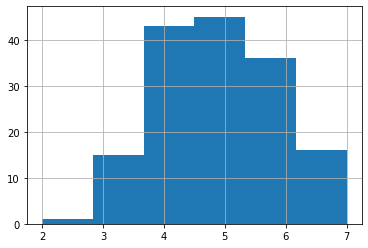

In [52]:
happy['Score short'].hist(bins=6)

### Можем наблюдать что основное распределение значений рейтинга находится вокруг 5